In [3]:
import pandas as pd
import plotly.express as px

In [10]:
##### Line plot: child mortality over time

df_under5 = pd.read_csv("../data/under_five.csv")

## subset on countries

countries = [
    "Angola",
    "Burundi",
    "Cameroon",
    "Central African Republic",
    "Chad",
    "Democratic Republic of the Congo",
    "Equatorial Guinea",
    "Gabon",
    "Congo",
    "Rwanda",
    "Sao Tome and Principe"
]


df_under5_central  = df_under5[df_under5['Location'].isin(countries)]

df_under5_central.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
19,MDG_0000000007,Under-five mortality rate (probability of dyin...,text,AFR,Africa,Country,TCD,Chad,Year,2021,...,NaN,NaN,69.89,NaN,141.80,100.14 [69.89-141.75],NaN,NaN,EN,2023-02-15T23:00:00.000Z
26,MDG_0000000007,Under-five mortality rate (probability of dyin...,text,AFR,Africa,Country,CAF,Central African Republic,Year,2021,...,NaN,NaN,83.82,NaN,135.30,106.74 [83.82-135.29],NaN,NaN,EN,2023-02-15T23:00:00.000Z
27,MDG_0000000007,Under-five mortality rate (probability of dyin...,text,AFR,Africa,Country,TCD,Chad,Year,2021,...,NaN,NaN,75.02,NaN,151.40,107.07 [75.02-151.42],NaN,NaN,EN,2023-02-15T23:00:00.000Z
47,MDG_0000000007,Under-five mortality rate (probability of dyin...,text,AFR,Africa,Country,TCD,Chad,Year,2021,...,NaN,NaN,79.31,NaN,161.20,113.65 [79.31-161.23],NaN,NaN,EN,2023-02-15T23:00:00.000Z
81,MDG_0000000007,Under-five mortality rate (probability of dyin...,text,AFR,Africa,Country,STP,Sao Tome and Principe,Year,2021,...,NaN,NaN,7.81,NaN,23.94,13.71 [7.81-23.94],NaN,NaN,EN,2023-02-15T23:00:00.000Z


In [11]:
### important row: "Location", "Value", "Period"

df_under5_central = df_under5_central[df_under5_central["Dim1"] == "Both sexes"]

df_under5_central = df_under5_central[["Location", "Period", "FactValueNumeric"]]

df_under5_central = df_under5_central.rename(columns = {"FactValueNumeric" : "Infant mortality per 1000 live births",
                                                       "Location" : "Country",
                                                       "Period" : "Year"})

df_under5_central.head()

,Country,Year,Infant mortality per 1000 live births
27,Chad,2021,107.10
114,Sao Tome and Principe,2021,15.43
345,Rwanda,2021,39.44
346,Gabon,2021,39.75
390,Congo,2021,42.97


In [6]:
df_under5_central.shape

(654, 3)

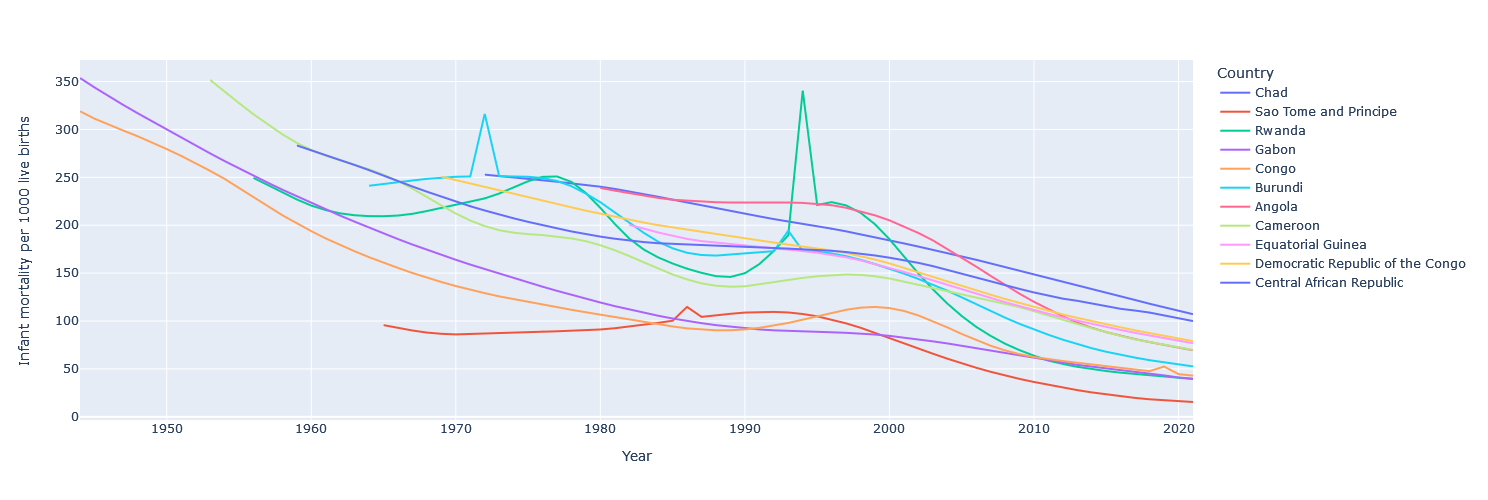

In [13]:
fig = px.line(df_under5_central, x="Year", y="Infant mortality per 1000 live births", color="Country")

fig.update_layout(height = 500)
fig.show()